## UCI Adult Income Dataset - Exploratory and Descriptive analysis

this notebook is focused on the explonatory and descriptive analysis of the cleaned version of the UCI Adult Income Dataset.

In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import plotly.express as px

## Define and Create Paths

In [4]:
# Get working directory
current_dir = os.getcwd()

# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)

# Define paths to the data folder
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')        
processed_dir = os.path.join(data_dir, 'processed')

# Define paths to results folder
results_dir = os.path.join(project_root_dir, 'results')

# Define paths to docs folder
docs_dir = os.path.join(project_root_dir, 'docs')

# Create directories if they do not exist
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## Read in the data

In [6]:
adult_data_filename = os.path.join(processed_dir, "adult_cleaned.csv")
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,high school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,high school graduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


## Check the shape of the dataset and datatypes

In [8]:
adult_df.shape

(32513, 16)

In [9]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32513 non-null  int64 
 1   workclass           32513 non-null  object
 2   fnlwgt              32513 non-null  int64 
 3   education_num       32513 non-null  int64 
 4   marital_status      32513 non-null  object
 5   relationship        32513 non-null  object
 6   race                32513 non-null  object
 7   sex                 32513 non-null  object
 8   capital_gain        32513 non-null  int64 
 9   capital_loss        32513 non-null  int64 
 10  hours_per_week      32513 non-null  int64 
 11  income              32513 non-null  object
 12  education_level     32513 non-null  object
 13  occupation_grouped  32513 non-null  object
 14  native_region       32513 non-null  object
 15  age_group           32513 non-null  object
dtypes: int64(6), object(10

## Summary Statistics
### Numerical variables

In [11]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.590256,1.897942e+05,10.081629,1079.239812,87.432719,40.440962
std,13.638932,1.055788e+05,2.572015,7390.625650,403.243596,12.350184
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_grouped,native_region,age_group
count,32513,32513,32513,32513,32513,32513,32513,32513,32513,32513
unique,6,4,5,5,2,2,7,5,6,7
top,private,married,male spouse,white,male,<=50k,high school graduate,white collar,north america,26-35
freq,22650,14984,13178,27771,21758,24677,10484,16532,30018,8501


In [13]:
# if you want the percentage
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696644
government       0.133793
self-employed    0.112447
unknown          0.056470
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [14]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460862
single                   0.327684
divorced or separated    0.180912
widowed                  0.030542
Name: proportion, dtype: float64

In [15]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405315
single               0.360686
child                0.155599
female spouse        0.048227
extended relative    0.030173
Name: proportion, dtype: float64

In [16]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854151
black                        0.096023
asian or pacific islander    0.031926
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

## Income Distribution

In [18]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


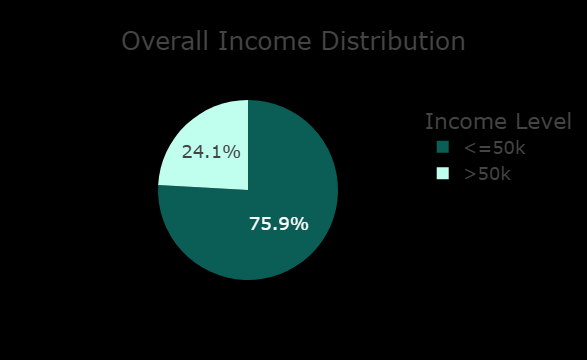

In [152]:
fig = px.pie(adult_df_income, names='income', values='total', title='Overall Income Distribution', color_discrete_sequence=['#0b5e55', '#c0ffee'])
fig.update_layout(template='presentation', legend_title=dict(text='Income Level'), paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_pie_chart.html'))

## Income by Age Group

In [21]:
adult_df_income_age = adult_df.groupby(['age_group', 'income']).size().reset_index(name='total_by_age').sort_values(['age_group', 'income'])
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5333
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [22]:
total_per_group = adult_df_income_age.groupby('age_group').size()
total_per_group

age_group
18-25    2
26-35    2
36-45    2
46-60    2
61-75    2
76+      2
<18      1
dtype: int64

In [23]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
total_per_group

0     5447
1     5447
2     8501
3     8501
4     8001
5     8001
6     7288
7     7288
8     2091
9     2091
10     240
11     240
12     945
Name: total_by_age, dtype: int64

In [24]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['total_by_age']/total_per_group) * 100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5333,97.907105
1,18-25,>50k,114,2.092895
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


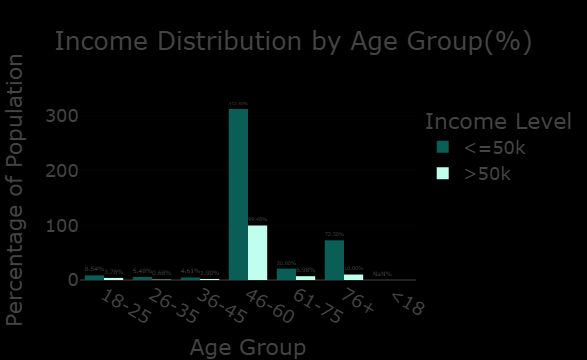

In [154]:
fig = px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color = 'income',
    title='Income Distribution by Age Group(%)',
    barmode='group',
    color_discrete_sequence=['#0b5e55', '#c0ffee'],
    text='percentage'
)
fig.update_traces(texttemplate = '%{text:.2f}%', textposition='outside')
fig.update_layout(template='presentation', legend_title=dict(text='Income Level'), xaxis_title='Age Group', yaxis_title='Percentage of Population', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroupbar.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroupbar.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_agegroupbar.html'))

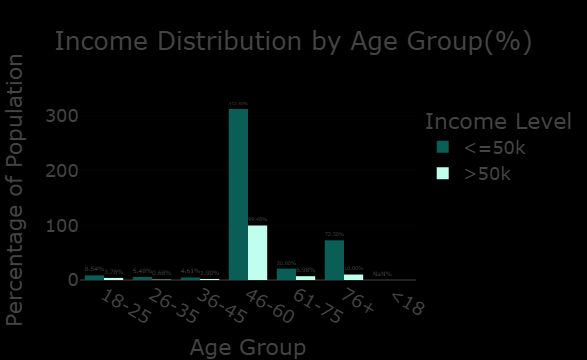

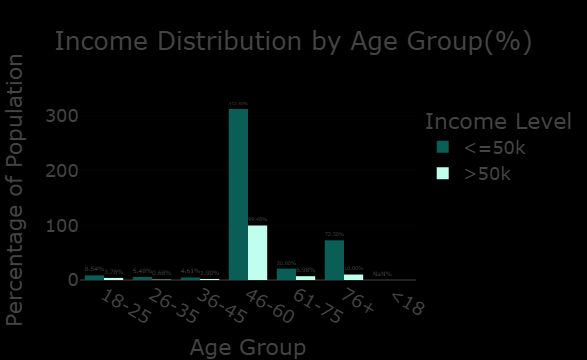

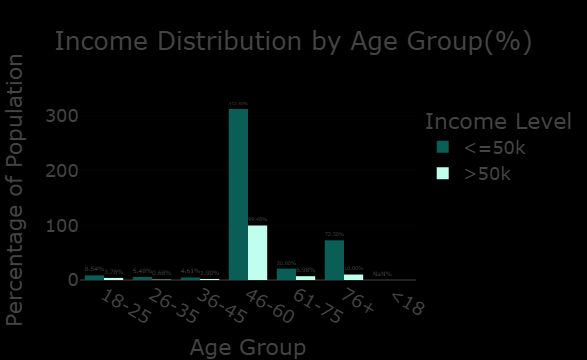

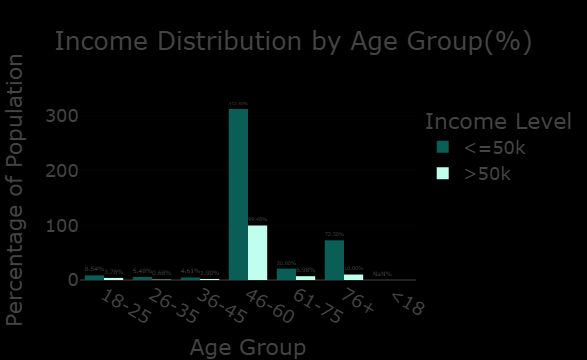

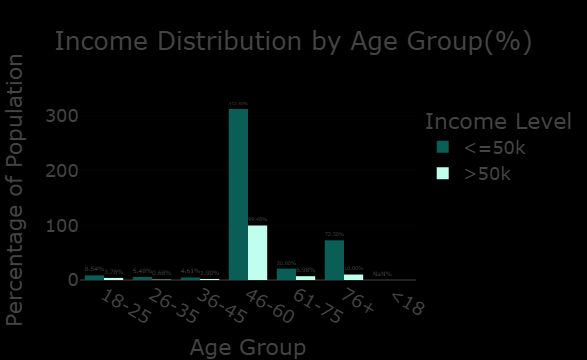

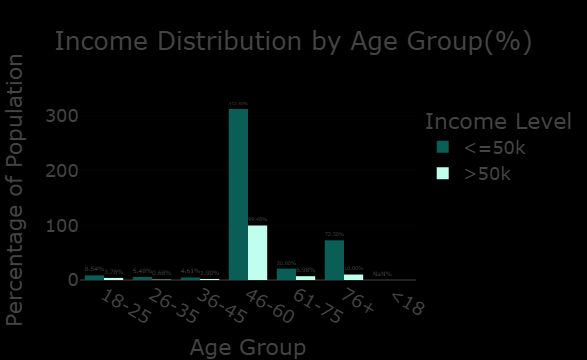

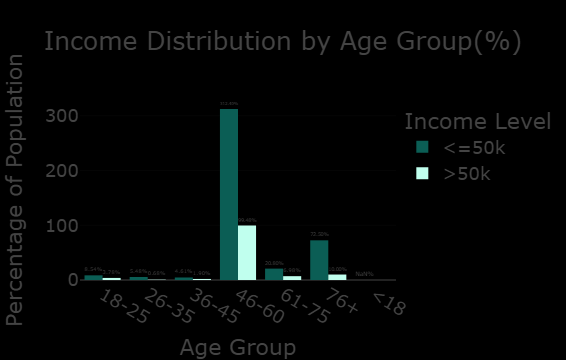

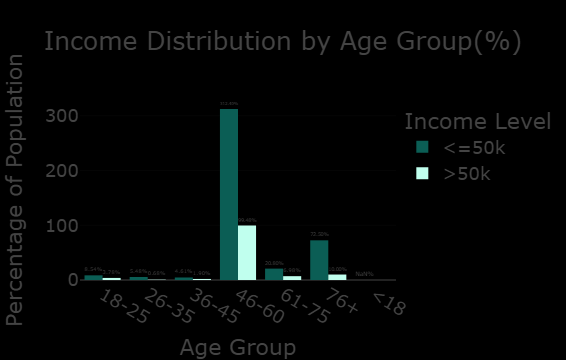

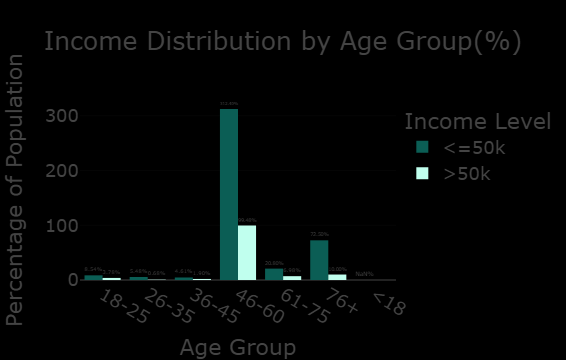

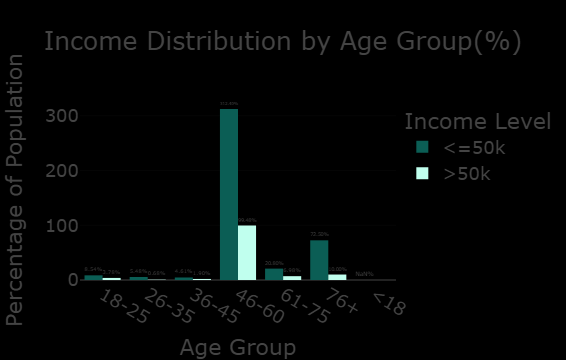

In [156]:
themes = ['plotly', 'plotly_white', 'plotly_dark', 'ggplot2', 'seaborn', 'simple_white', 'presentation', 'xgridoff', 'gridon', 'none']
for theme in themes:
    fig.update_layout(template='presentation', legend_title=dict(text='Income Level'), xaxis_title='Age Group', yaxis_title='Percentage of Population', paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')
    fig.show()

fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroupbar.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_agegroupbar.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_agegroupbar.html'))

## Income by Native Region

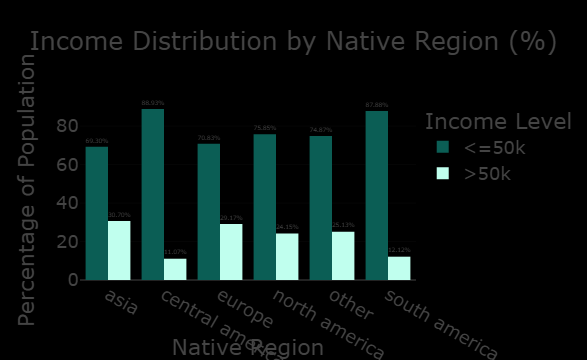

In [160]:
# Group by native_region and income, count occurrences
adult_df_income_reg = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_reg')

# Calculate total per native_region
total_per_group = adult_df_income_reg.groupby('native_region')['total_income_reg'].transform('sum')

# Calculate percentage
adult_df_income_reg['percentage'] = (adult_df_income_reg['total_income_reg'] / total_per_group) * 100

# Plot the bar chart
fig = px.bar(
    adult_df_income_reg,
    x='native_region',
    y='percentage',
    color='income',
    title='Income Distribution by Native Region (%)',
    barmode='group',
    color_discrete_sequence=['#0b5e55', '#c0ffee'],
    text='percentage'
)

# Format the text on bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(template='presentation', legend_title=dict(text='Income Level'), xaxis_title='Native Region', yaxis_title='Percentage of Population', xaxis_title_standoff=50, paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')

# Show the figure
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_nativeregion_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_nativeregion_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_nativeregion_bar_plot.html'))

## Income by Race

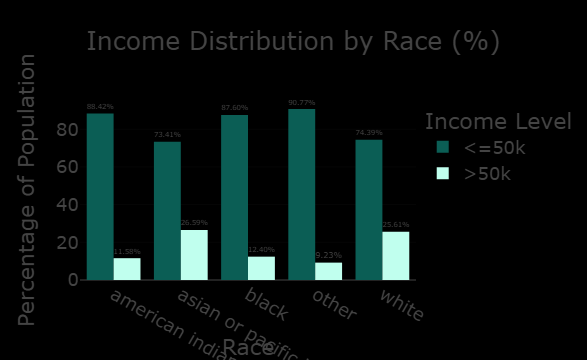

In [162]:
# Group by race and income, count occurrences
adult_df_income_race = adult_df.groupby(['race', 'income']).size().reset_index(name='total_income_reg')

# Calculate total per race
total_per_group = adult_df_income_race.groupby('race')['total_income_reg'].transform('sum')

# Calculate percentage
adult_df_income_race['percentage'] = (adult_df_income_race['total_income_reg'] / total_per_group) * 100

# Plot the bar chart
fig = px.bar(
    adult_df_income_race,
    x='race',
    y='percentage',
    color='income',
    title='Income Distribution by Race (%)',
    barmode='group',
    color_discrete_sequence=['#0b5e55', '#c0ffee'],
    text='percentage'
)

# Format the text on bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(template='presentation', legend_title=dict(text='Income Level'), xaxis_title='Race', yaxis_title='Percentage of Population', xaxis_title_standoff=50, paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')

# Show the figure
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_Race_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_Race_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_Race_bar_plot.html'))

In [107]:
adult_df_income_edu_occ = (adult_df.groupby(['education_level', 'occupation_grouped', 'income']).size().reset_index(name='total').sort_values('total', ascending=False))
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total
8,high school graduate,blue collar,<=50k,3976
56,tertiary,white collar,>50k,3545
55,tertiary,white collar,<=50k,3369
45,some college,white collar,<=50k,3003
15,high school graduate,white collar,<=50k,2900
38,some college,blue collar,<=50k,1503
11,high school graduate,service,<=50k,1444
29,secondary,blue collar,<=50k,1349
6,associate,white collar,<=50k,1015
41,some college,service,<=50k,902


In [109]:
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['education_level'] + ' | ' + adult_df_income_edu_occ['occupation_grouped'])
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total,edu_occ
8,high school graduate,blue collar,<=50k,3976,high school graduate | blue collar
56,tertiary,white collar,>50k,3545,tertiary | white collar
55,tertiary,white collar,<=50k,3369,tertiary | white collar
45,some college,white collar,<=50k,3003,some college | white collar
15,high school graduate,white collar,<=50k,2900,high school graduate | white collar
38,some college,blue collar,<=50k,1503,some college | blue collar
11,high school graduate,service,<=50k,1444,high school graduate | service
29,secondary,blue collar,<=50k,1349,secondary | blue collar
6,associate,white collar,<=50k,1015,associate | white collar
41,some college,service,<=50k,902,some college | service


In [111]:
adult_df_income_edu_occ.head(15)

,education_level,occupation_grouped,income,total,edu_occ
8,high school graduate,blue collar,<=50k,3976,high school graduate | blue collar
56,tertiary,white collar,>50k,3545,tertiary | white collar
55,tertiary,white collar,<=50k,3369,tertiary | white collar
45,some college,white collar,<=50k,3003,some college | white collar
15,high school graduate,white collar,<=50k,2900,high school graduate | white collar
38,some college,blue collar,<=50k,1503,some college | blue collar
11,high school graduate,service,<=50k,1444,high school graduate | service
29,secondary,blue collar,<=50k,1349,secondary | blue collar
6,associate,white collar,<=50k,1015,associate | white collar
41,some college,service,<=50k,902,some college | service


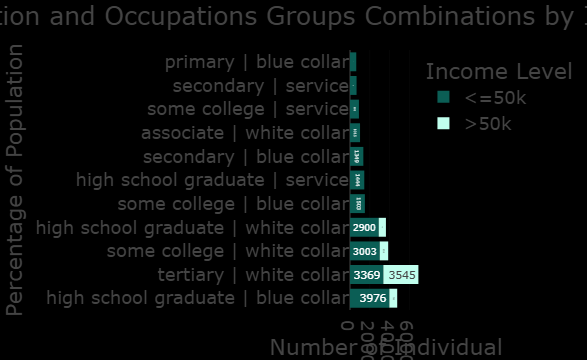

In [166]:
num = 15
adult_df_combos = adult_df_income_edu_occ.head(num)

fig = px.bar(
    adult_df_combos,
    x='total',
    y='edu_occ',
    color='income',
    orientation='h',
    title=f'Top {num} Education and Occupations Groups Combinations by Income Group',
    # barmode='group',
    color_discrete_sequence=['#0b5e55', '#c0ffee'],
    text='total'
)

fig.update_layout(
    template='presentation',
    xaxis_title='Number of Individuals',
    yaxis_title='Education | Occupation Group',
    legend_title=dict(text='Income Level'),
    margin=dict(l=350, r=50, t=50, b=50)  # fixed typo here
)

fig.update_traces(textposition='inside')
fig.update_layout(template='presentation', legend_title=dict(text='Income Level'), xaxis_title='Number of Individual', yaxis_title='Percentage of Population', xaxis_title_standoff=50, paper_bgcolor='rgb(0, 0, 0)', plot_bgcolor='rgb(0, 0, 0)')
fig.show()
fig.write_image(os.path.join(results_dir, 'income_distribution_by_eduandocc_bar_plot.jpg'))
fig.write_image(os.path.join(results_dir, 'income_distribution_by_eduandocc_bar_plot.png'))
fig.write_html(os.path.join(results_dir, 'income_distribution_by_edu_occandbar_plot.html'))